In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.special import lambertw

In [48]:
from simulatedAnnealing import mutate

initial_temp * cooling^n <= freezing_temp
cooling^n <= freezing_temp/initial_temp
n * ln(cooling) <= ln(freezing_temp/initial_temp)
n <= ln(freezing_temp/initial_temp) / ln(cooling)

In [49]:
freezing_temp = 0.1
initial_temp = 2500
cooling = 0.99
n = int(np.ceil(np.log(freezing_temp/initial_temp) / np.log(cooling)))

In [50]:
cooling_powers = np.array([cooling**i for i in range(n)])
mutation_rates = np.array([[cooling**i * n_items for n_items in range(16,25)] for i in range(n)])

In [51]:
re = mutation_rates

In [52]:
from pandas import DataFrame
df = DataFrame(data=mutation_rates, columns=range(16,25))
df.head()

,16,17,18,19,20,21,22,23,24
0,16.000000,17.000000,18.000000,19.000000,20.00000,21.000000,22.000000,23.000000,24.000000
1,15.840000,16.830000,17.820000,18.810000,19.80000,20.790000,21.780000,22.770000,23.760000
2,15.681600,16.661700,17.641800,18.621900,19.60200,20.582100,21.562200,22.542300,23.522400
3,15.524784,16.495083,17.465382,18.435681,19.40598,20.376279,21.346578,22.316877,23.287176
4,15.369536,16.330132,17.290728,18.251324,19.21192,20.172516,21.133112,22.093708,23.054304


<AxesSubplot:>

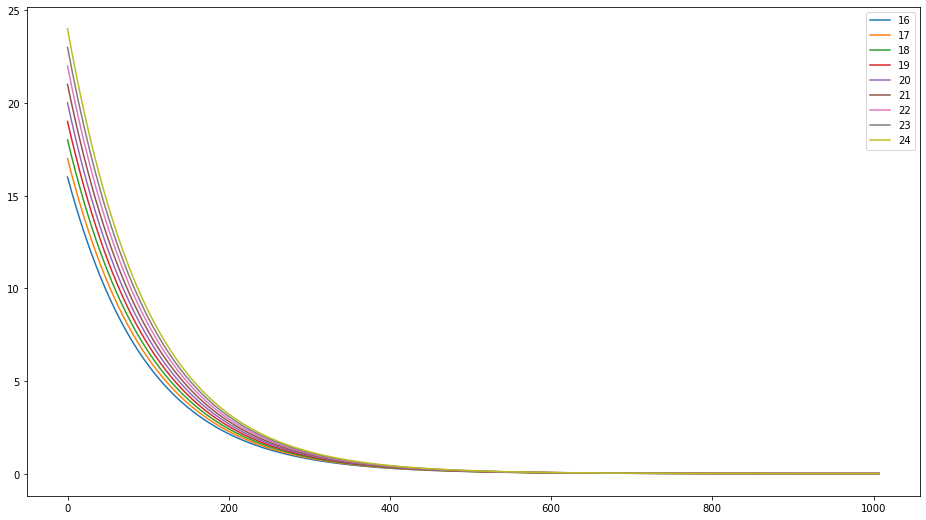

In [33]:
df.plot(figsize=(16, 9))

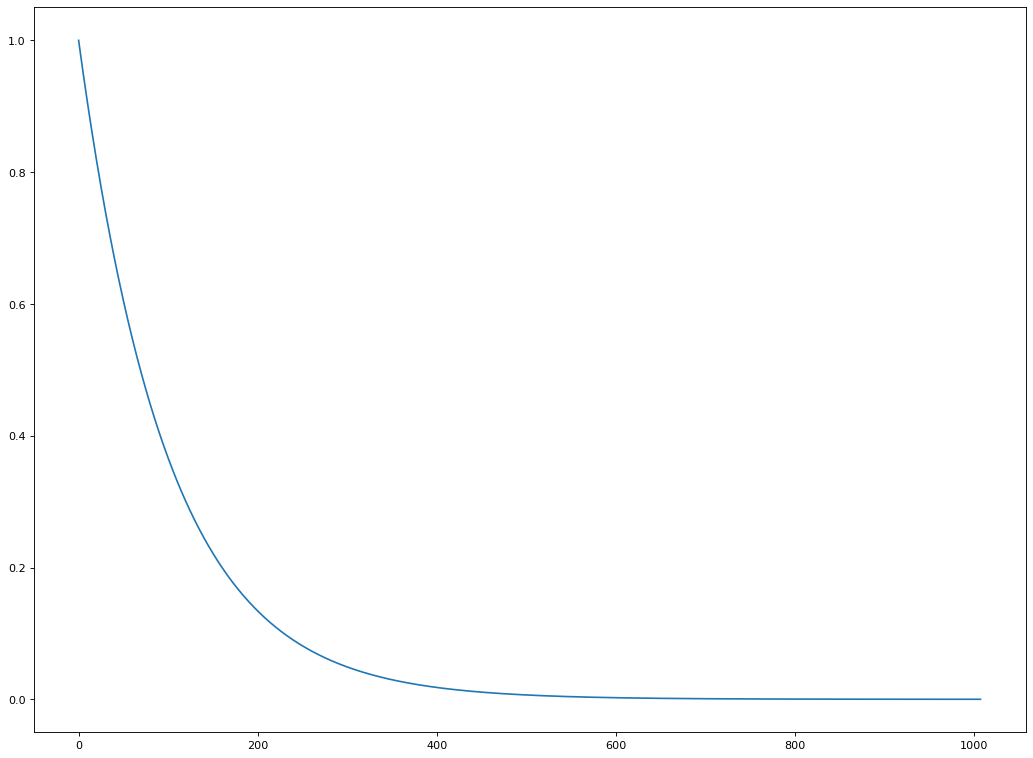

In [39]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(cooling_powers)
# plt.scatter(best_value_index, scores[best_value_index], color="r", s=200, zorder=2)
# plt.plot(range(len(scores)), scores, color="b", zorder=1)
# plt.title('Value changes')
# plt.ylabel('Value')
# plt.xlabel('Iteration')
plt.show()

In [42]:
all_std = np.array([[np.sqrt(cooling_power * n_items * (1 - cooling_power))  for n_items in range(16,25)] for cooling_power in cooling_powers])

In [43]:
all_std

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39799497, 0.41024383, 0.42213742, ..., 0.46669048, 0.47717921,
        0.4874423 ],
       [0.55862674, 0.57581927, 0.59251314, ..., 0.65504792, 0.66976994,
        0.68417524],
       ...,
       [0.02562928, 0.02641805, 0.02718395, ..., 0.03005299, 0.03072842,
        0.03138933],
       [0.02550081, 0.02628564, 0.0270477 , ..., 0.02990236, 0.0305744 ,
        0.03123199],
       [0.02537299, 0.02615388, 0.02691213, ..., 0.02975247, 0.03042115,
        0.03107545]])

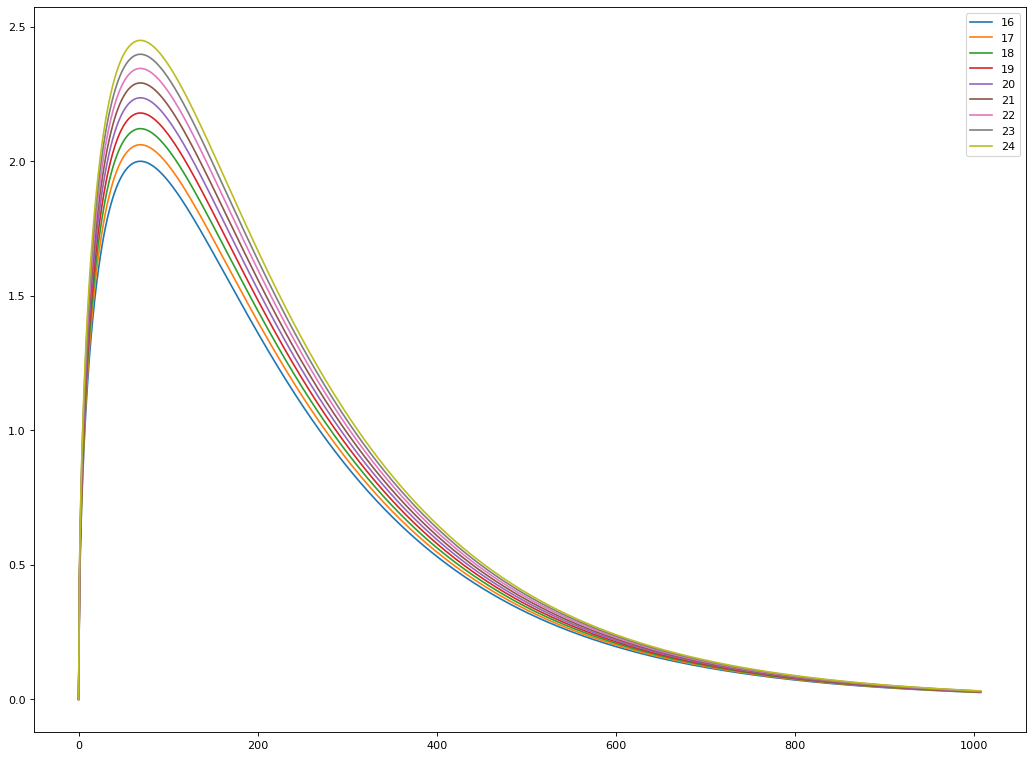

In [46]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(all_std)
# plt.scatter(best_value_index, scores[best_value_index], color="r", s=200, zorder=2)
# plt.plot(range(len(scores)), scores, color="b", zorder=1)
# plt.title('Value changes')
# plt.ylabel('Value')
# plt.xlabel('Iteration')
plt.legend(range(16,25))
plt.show()

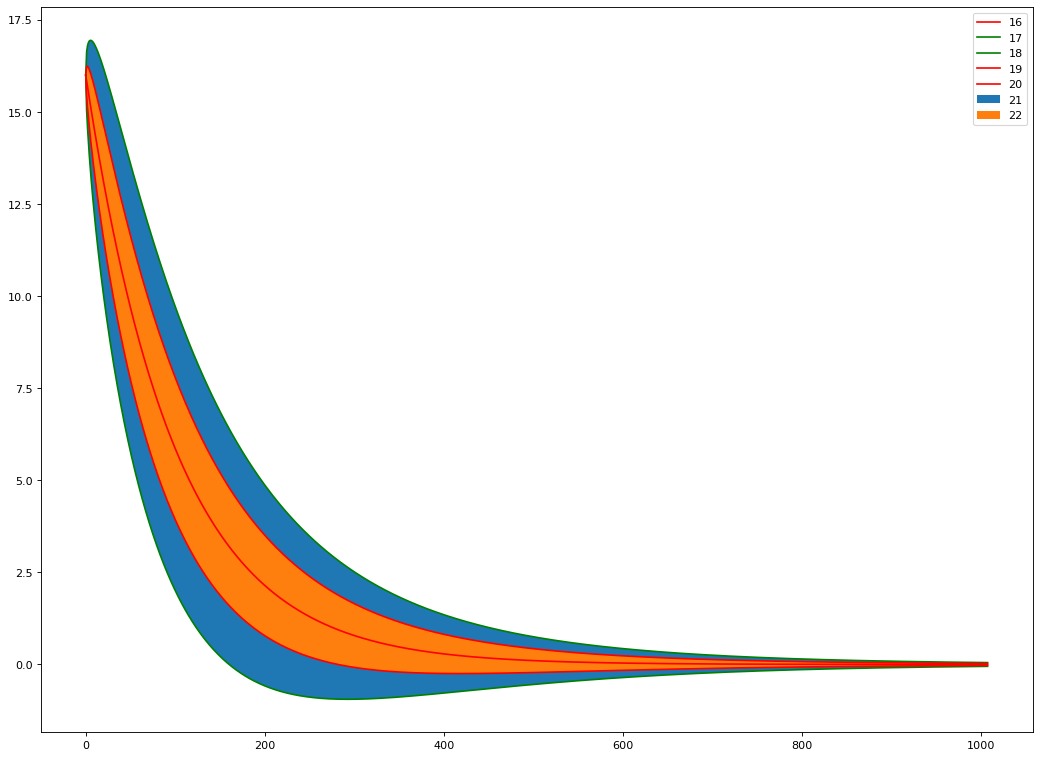

In [59]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(mutation_rates[:,0], c='r')

plt.plot(mutation_rates[:,0] + all_std[:,0] * 2, c='g')
plt.plot(mutation_rates[:,0] - all_std[:,0] * 2, c='g')
plt.fill_between(range(n), mutation_rates[:,0] - all_std[:,0] * 2, mutation_rates[:,0] + all_std[:,0] * 2)

plt.plot(mutation_rates[:,0] + all_std[:,0], c='r')
plt.plot(mutation_rates[:,0] - all_std[:,0], c='r')
plt.fill_between(range(n), mutation_rates[:,0] - all_std[:,0], mutation_rates[:,0] + all_std[:,0])

# plt.title('Value changes')
# plt.ylabel('Value')
# plt.xlabel('Iteration')
plt.legend(range(16,25))
plt.show()

In [ ]:
from pandas import read_csv
max_weight = 3
data_nc16 = read_csv("Data//no_correlation_16")
n_items = data_nc16.shape[0]
values = data_nc16.value.values
weights = data_nc16.weight.values